In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
df = pd.read_csv("features2.csv")
df.head()

,popularity,danceability,energy,loudness,speechiness,duration_ms,tempo,class,Score,Input
0,94,0.851,0.541,-6.825,0.0505,235545,124.959,0,34.918375,40.0
1,97,0.511,0.566,-7.230,0.2000,239836,83.903,0,29.208650,NaN
2,95,0.680,0.563,-5.843,0.0454,231267,145.028,1,37.809855,NaN
3,91,0.900,0.653,-6.962,0.2890,145603,112.503,0,30.590125,NaN
4,84,0.572,0.385,-6.362,0.0308,215733,95.799,0,28.939735,NaN


In [3]:
target = df["class"]
target_names = ["Not Recommended", "Recommended"]

In [4]:
data = df.drop(["class", "Score","Input"], axis=1)
feature_names = data.columns
data.head()

,popularity,danceability,energy,loudness,speechiness,duration_ms,tempo
0,94,0.851,0.541,-6.825,0.0505,235545,124.959
1,97,0.511,0.566,-7.230,0.2000,239836,83.903
2,95,0.680,0.563,-5.843,0.0454,231267,145.028
3,91,0.900,0.653,-6.962,0.2890,145603,112.503
4,84,0.572,0.385,-6.362,0.0308,215733,95.799


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.640
k: 3, Train/Test Score: 0.773/0.560
k: 5, Train/Test Score: 0.760/0.680
k: 7, Train/Test Score: 0.760/0.600
k: 9, Train/Test Score: 0.760/0.600
k: 11, Train/Test Score: 0.733/0.600
k: 13, Train/Test Score: 0.733/0.600
k: 15, Train/Test Score: 0.733/0.600
k: 17, Train/Test Score: 0.733/0.600
k: 19, Train/Test Score: 0.733/0.600
k: 21, Train/Test Score: 0.733/0.600
k: 23, Train/Test Score: 0.733/0.600
k: 25, Train/Test Score: 0.733/0.600
k: 27, Train/Test Score: 0.733/0.600
k: 29, Train/Test Score: 0.733/0.600


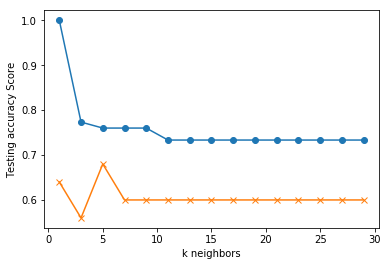

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.600
